In [121]:
import numpy as np
import pandas as pd
import lxml
import matplotlib.pyplot as plt

%matplotlib notebook

In [19]:
df = pd.read_html('match-history.html', encoding = 'utf-8')[0]

In [23]:
df.columns = df.columns.get_level_values(1)

In [18]:
pd.read_html?

In [28]:
df

,Date,P,Blue,Red,Winner,Bans,Bans.1,Picks,Picks.1,Blue Roster,...,BRH,RG,RK,RT,RD,RB,RRH,SB,MH,VOD
0,2021-03-21 14:48:00,11.5,CERBERUS Esports (Vietnamese Team),Team Flash.Vietnam,CERBERUS Esports (Vietnamese Team),"Sett,Gragas,Seraphine,Syndra,Rakan","Thresh,Udyr,Rell,Leona,Lucian","Renekton,Lillia,Tristana,Xayah,Alistar","Ornn,Hecarim,Cassiopeia,Kai'Sa,Galio","Pun,Xuhao,Yado,Artemis (Trần Quốc Hưng),RonOP",...,2,55415,12,2,2,0,0,SB,http://matchhistory.na.leagueoflegends.com/en/...,http://youtu.be/950sVaoG4-w?t=629
1,2021-03-21 13:46:00,11.5,Team Flash.Vietnam,CERBERUS Esports (Vietnamese Team),CERBERUS Esports (Vietnamese Team),"Thresh,Rell,Hecarim,Leona,Renekton","Gragas,Tristana,Seraphine,Gnar,Rakan","Aatrox,Udyr,Orianna,Kai'Sa,Sett","Sion,Lillia,Ryze,Xayah,Alistar","Yoshino,Meliodas (Hoàng Tiến Nhật),Pake,Divkid...",...,2,76119,28,8,4,1,0,SB,http://matchhistory.na.leagueoflegends.com/en/...,http://youtu.be/HkiGSvAycds?t=103
2,2021-03-21 12:24:00,11.5,CERBERUS Esports (Vietnamese Team),Team Flash.Vietnam,Team Flash.Vietnam,"Sett,Seraphine,Udyr,Syndra,Ornn","Thresh,Zoe,Hecarim,Lucian,Malphite","Renekton,Lillia,Viktor,Kai'Sa,Rell","Gragas,Graves,Orianna,Tristana,Rakan","Pun,Xuhao,Yado,Artemis (Trần Quốc Hưng),RonOP",...,0,64956,22,8,2,1,2,SB,http://matchhistory.na.leagueoflegends.com/en/...,http://youtu.be/KEhFtCDMpzs?t=308
3,2021-03-21 11:36:00,11.5,GAM Esports,Saigon Buffalo,GAM Esports,"Seraphine,Udyr,Hecarim,Malphite,Camille","Rell,Thresh,Renekton,Gragas,Nidalee","Gnar,Karthus,Lucian,Tristana,Leona","Irelia,Lillia,Kalista,Kai'Sa,Galio","Kiaya,Levi,Kati,Sty1e,Bie",...,2,41270,8,0,2,0,0,SB,http://matchhistory.na.leagueoflegends.com/en/...,http://youtu.be/C5CKHkhaW3k?t=96
4,2021-03-21 10:48:00,11.5,Saigon Buffalo,GAM Esports,Saigon Buffalo,"Rell,Thresh,Tristana,Rakan,Malphite","Seraphine,Galio,Kai'Sa,Leona,Braum","Gnar,Hecarim,Zoe,Jinx,Gragas","Camille,Udyr,Orianna,Xayah,Alistar","Hasmed,BeanJ,Rby,Arrietty,Taki (Đinh Anh Tài)",...,1,47271,8,2,0,0,1,SB,http://matchhistory.na.leagueoflegends.com/en/...,http://youtu.be/LLy6zzE9ncQ?t=83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2021-01-22 13:52:00,11.1,SBTC Esports,Burst The Sky Esports,SBTC Esports,"Zoe,Akali,Camille,Yone,Vladimir","Pantheon,Lucian,Taliyah,Anivia,Galio","Gnar,Nidalee,Viktor,Samira,Rell","Wukong,Olaf,Twisted Fate,Kai'Sa,Rakan","Dia1,Yijin,Petland,Celebrity,Slay",...,2,50552,15,1,2,0,0,SB,http://matchhistory.na.leagueoflegends.com/en/...,http://youtu.be/1YB8gvimrIk?t=226
105,2021-01-22 13:01:00,11.1,Burst The Sky Esports,SBTC Esports,SBTC Esports,"Lucian,Taliyah,Nidalee,Anivia,Alistar","Zoe,Akali,Rell,Sett,Syndra","Vladimir,Pantheon,Viktor,Aphelios,Thresh","Camille,Gragas,Galio,Samira,Leona","TH,Draktharr,Gloryy,Bigkoro,Elio",...,0,54010,19,10,3,1,2,SB,http://matchhistory.na.leagueoflegends.com/en/...,http://youtu.be/_ytlpOTqKcY?t=283
106,2021-01-22 11:48:00,11.1,SBTC Esports,Burst The Sky Esports,Burst The Sky Esports,"Zoe,Thresh,Akali,Lillia,Syndra","Pantheon,Lucian,Taliyah,Anivia,Sett","Malphite,Graves,Viktor,Kai'Sa,Galio","Camille,Nidalee,Sylas,Samira,Rell","Dia1,Yijin,Petland,Celebrity,Slay",...,0,73823,15,10,5,2,2,SB,http://matchhistory.na.leagueoflegends.com/en/...,http://youtu.be/1YcMzuRjy4Q?t=253
107,2021-01-22 10:52:00,11.1,CERBERUS Esports (Vietnamese Team),GMedia Luxury,CERBERUS Esports (Vietnamese Team),"Nidalee,Renekton,Graves,Sett,Alistar","Pantheon,Thresh,Samira,Bard,Galio","Kennen,Olaf,Zoe,Aphelios,Nautilus","Gnar,Lillia,Lucian,Kai'Sa,Gragas","Pun,Phuc1,Yado,Artemis (Trần Quốc Hưng),RonOP",...,2,38267,5,3,1,0,0,SB,http://matchhistory.na.leagueoflegends.com/en/...,http://youtu.be/9cfzIwlo0LI?t=69


In [29]:
for col in ['Bans', 'Bans.1', 'Picks', 'Picks.1']:
    df[col] = df[col].str.split(',')

In [98]:
df.loc[0]['Bans'] + df.loc[0]['Bans.1']

['Sett',
 'Gragas',
 'Seraphine',
 'Syndra',
 'Rakan',
 'Thresh',
 'Udyr',
 'Rell',
 'Leona',
 'Lucian']

In [94]:
df_banpick = df[['P', 'Bans', 'Bans.1', 'Picks', 'Picks.1']]

In [100]:
ban_pool = np.unique(np.concatenate(df['Bans'].values + df['Bans.1'].values))

In [101]:
pick_pool = np.unique(np.concatenate(df['Picks'].values + df['Picks.1'].values))

In [115]:
np.where(pick_pool == 'Aatrox')[0][0]

0

In [116]:
ban_counts = [0 for _ in range(len(ban_pool))]
pick_counts = [0 for _ in range(len(pick_pool))]

def cal_ban(row, inp, ret):
    for champ in row['Bans'] + row['Bans.1']:
        ret[np.where(inp == champ)[0][0]] += 1
        
def cal_pick(row, inp, ret):
    for champ in row['Picks'] + row['Picks.1']:
        ret[np.where(inp == champ)[0][0]] += 1

df_banpick.apply(cal_ban, axis = 1, args = (ban_pool, ban_counts,))
df_banpick.apply(cal_pick, axis = 1, args = (pick_pool, pick_counts,))

0      None
1      None
2      None
3      None
4      None
       ... 
104    None
105    None
106    None
107    None
108    None
Length: 109, dtype: object

<IPython.core.display.Javascript object>


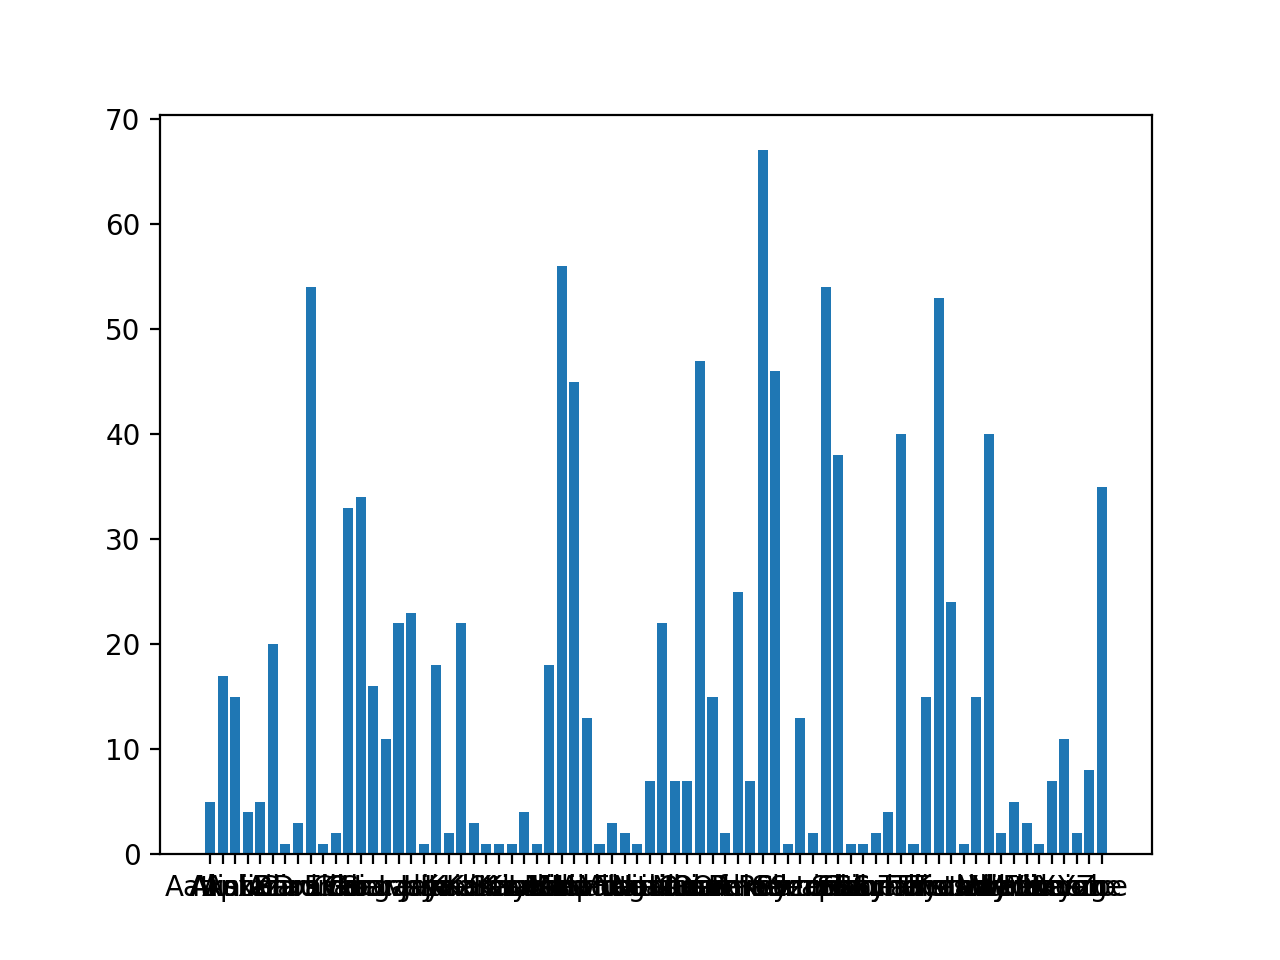

<BarContainer object of 72 artists>

In [122]:
plt.figure()

plt.bar(ban_pool, ban_counts)